## Taller 5

### Encontrar el tamaño de la vesícula

In [1]:
%pylab inline
from scipy import ndimage

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
from PIL import ImageOps
from skimage import feature

Lo primero que se hace es importar la imagen, luego se pasa la imagen a escala de grises, tambien se le aplica un poco de contraste a la imagen para que canny funcione mejor. Por ultimo, se pasa la imagen a forma de vector con la función de numpy asarray.

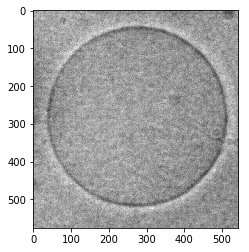

In [3]:
Im1 = pylab.imread("ves_full_150_002.jpg")
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
pylab.gray()

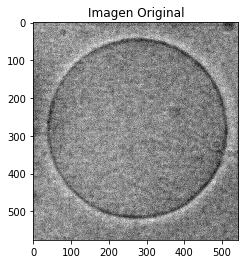

In [4]:
foto = Image.open("ves_full_150_002.jpg")
imagen_gris = foto.convert('L')
autocontraste = ImageOps.autocontrast(imagen_gris, cutoff=0)
autocontraste.show()
Im_1=numpy.asarray(autocontraste)
plt.title('Imagen Original', fontsize=12)
pylab.imshow(Im_1)

Luego, se palica canny que basicamente reconoce los bordes de la figura, en este caso se utilizo un sigma de 4 en el canny para eliminar todo el ruido que pueda tener la imagen.

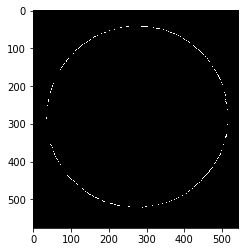

In [5]:
edges3 = feature.canny(Im_1,sigma=4)
plt.imshow(edges3, cmap=plt.cm.gray)

In [6]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

Luego, se aplica hough para formar el circulo de la vesiculo y asi poder determinar su tamaño, en este caso los limites para el tamaño de la vesicula que se utlizaron fueron de 200 y 350.

In [7]:
hough_radii = np.arange(200, 350, 2)
hough_res = hough_circle(edges3, hough_radii)

In [8]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

Luego, con la función cincle_perimeter obtenemos los puntos del perimetro dle circulo y lo graficamos

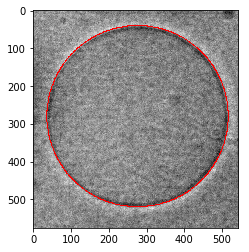

In [9]:
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    plt.plot(circx,circy,',r')
pylab.imshow(Im_1)

In [10]:
radii,cx,cy

(array([240]), array([275]), array([281]))

La vesícula tiene de diámetro 480 pixeles y la posición de su centroide es 275 en x y 281 en y

## Granulometria

Lo primero que se hizo fue importar la imagen original

Text(0.5,1,'Imagen Original')

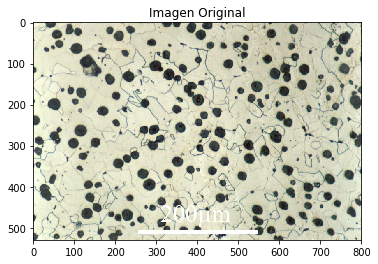

In [11]:
Im1 = pylab.imread("000398.jpg")
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)

In [12]:
import cv2

Luego se utliza la libreria cv2 para covertir la imagen en binario.

In [13]:
img = cv2.imread('000398.jpg')
img2 = cv2.imread('000398.jpg')
img3 = cv2.imread('000398.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret2, thresh2 = cv2.threshold(gray,255,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

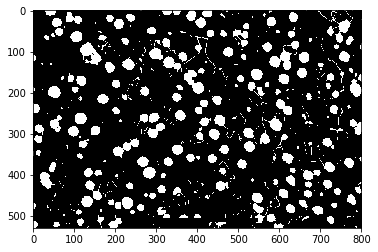

In [14]:
pylab.imshow(thresh)

In [15]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

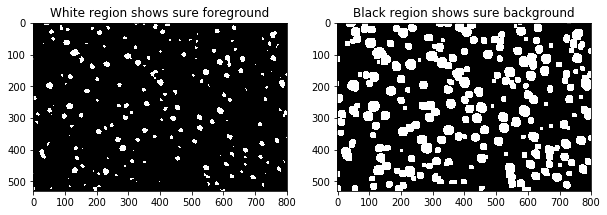

In [25]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title("White region shows sure foreground")
pylab.imshow(sure_fg)
plt.subplot(1,2,2)
plt.title("Black region shows sure background")
pylab.imshow(sure_bg)

In [47]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [48]:
markers = cv2.watershed(img,markers)

In [49]:
img[markers == -1] = [255,0,0]

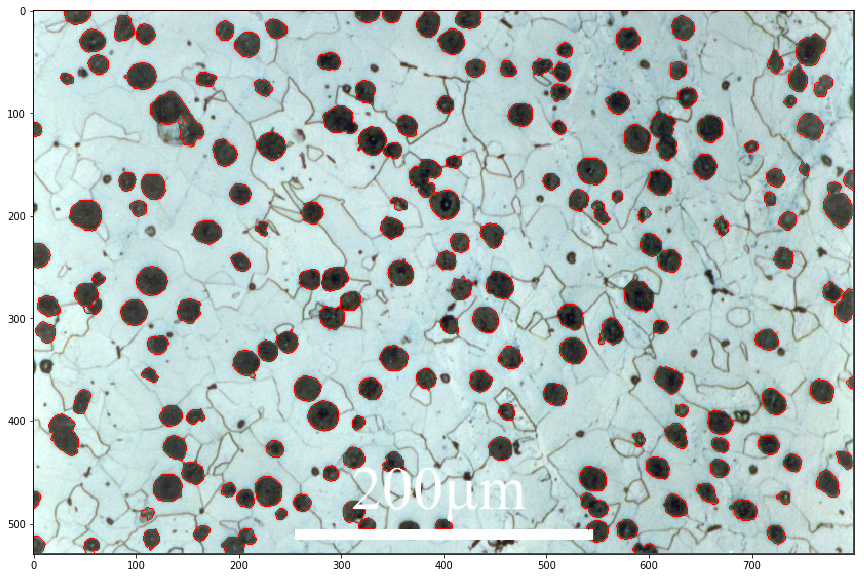

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(img)

In [51]:
ret

184

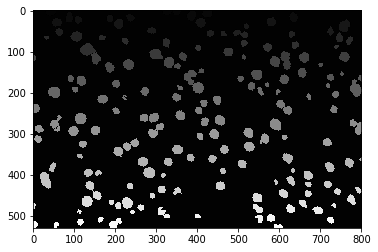

In [52]:
plt.imshow(markers)

In [53]:
for i in range (0,530):
    for y in range(0,800):
        for z in range(0,3):
        
            img2[i][y][z]=0

In [54]:
img2[markers == -1] = [255,255,255]

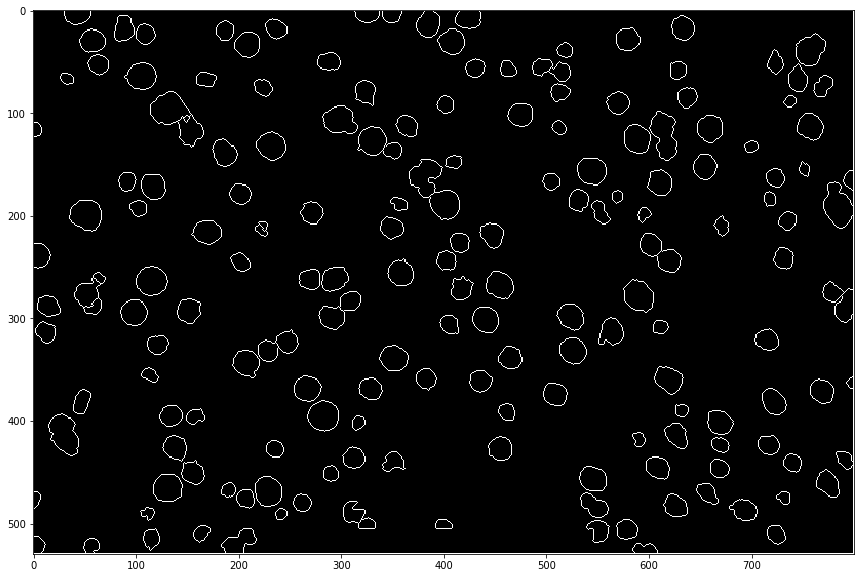

In [55]:
plt.figure(figsize=(20,10))
plt.imshow(img2)

In [164]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

In [165]:
gray3 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [166]:
hough_radii = np.arange(5,20,1)
hough_res = hough_circle(gray3, hough_radii)

In [167]:
hough_radii

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [168]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=184)

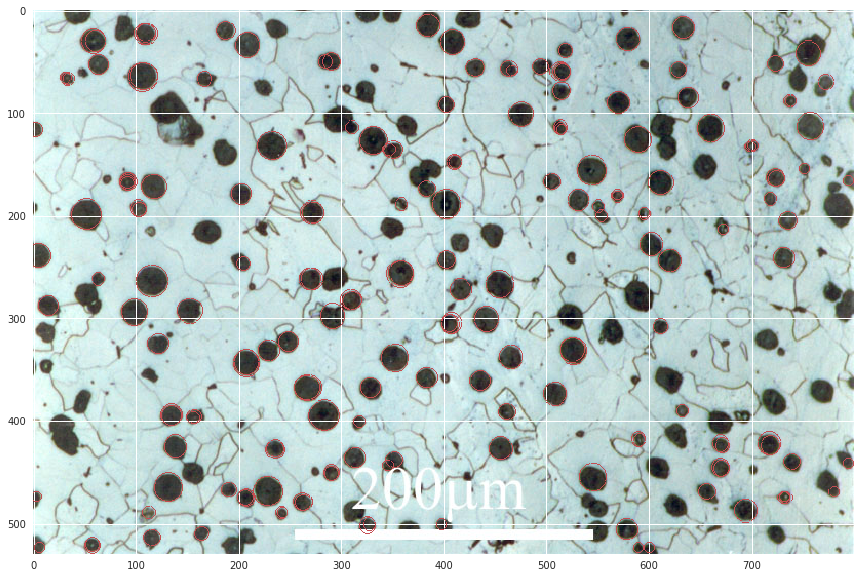

In [169]:
plt.figure(figsize=(20,10))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    plt.plot(circx,circy,',r')

plt.imshow(img3)

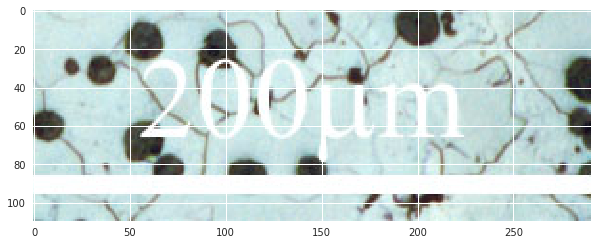

In [142]:
lx, ly = img3.shape[0:2]
# Cropping
crop_face = img3[420:600,255:546, :]
plt.figure(figsize=(10,5))
plt.imshow(crop_face)

Se tiene que 200 mm son aproximadamente 291 pixeles, utilizaremos este valor como factor de conversión,

In [143]:
radiome=radii*(200/291)

In [144]:
Diametro = radiome*2

In [145]:
import seaborn as sns
sns.set(color_codes=False)

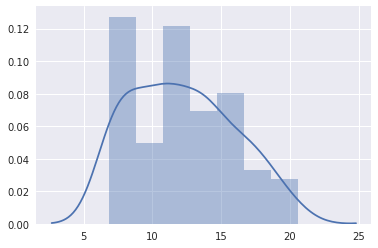

In [146]:
sns.distplot(Diametro)

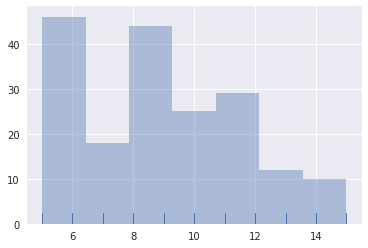

In [147]:
sns.distplot(radii, kde=False, rug=True)